# Simulación del fenómeno: pelotas danzantes

In [2]:
# importamos las librerias necesarias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
# Definimos las funciones necesarias
def F_chorro(v_c, a_c):
    """
    Funcion que calcula la fuerza de impacto de un chorro de agua sobre una superficie
    v_c: velocidad del chorro de agua al impactar [m/s]
    a_c: area de impacto del chorro de agua [m2]
    """
    RHO = 1000
    return RHO*v_c**2*a_c


def acc(x, R, M, F):
    """
    Funcion que calcula la aceleracion de la esfera
    x: posicion del objeto respecto al equilibrio [m]
    R: radio de la esfera [m]
    M: masa del objeto [kg]
    F: fuerza que actua sobre el objeto [N]
    """
    return 5/2*F*np.sin(x/R)/M

In [15]:
# Definimos constantes
R = 4e-2 # Radio de la esfera [m]
M = 3e-3 # Masa de la esfera [kg]
v_c = 400e-2 # Velocidad del chorro de agua [m/s]
R_grifo = 2.2e-2 # Radio del grifo [m]
a_c = np.pi*R_grifo**2 # Area de impacto del chorro de agua [m2]
F_c = F_chorro(v_c, a_c) # Fuerza de impacto del chorro de agua [N]

# Definimos parametros iniciales y de simulación
dt = 1e-3 # Paso de tiempo [s]
t0 = 0 # Tiempo inicial [s]
x0 = R-1e-3 # Posicion inicial [m]
v0 = 0 # Velocidad inicial [m/s]
a0 = acc(x0, R, M, F_c) # Aceleracion inicial [m/s2]
t_max = 1 # Tiempo maximo de simulacion [s]

# Definimos listas para guardar los datos
t = [t0]
x = [x0]
v = [v0]
a = [a0]

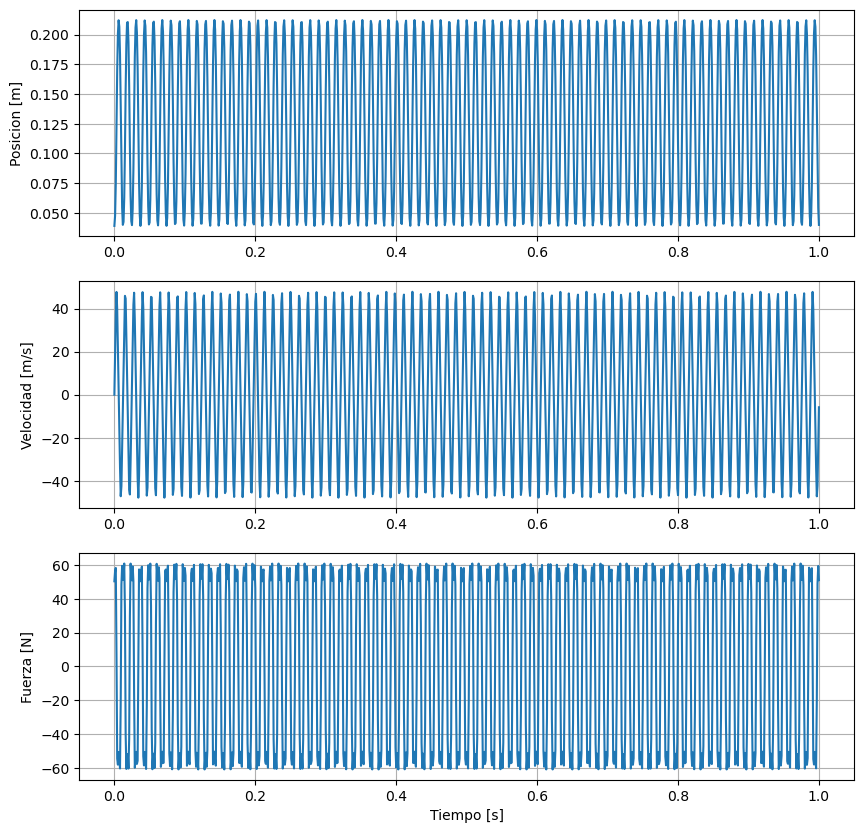

In [19]:
# Realizamos la simulacion
while t[-1] < t_max:
    x.append(x[-1] + v[-1]*dt + 0.5*a[-1]*dt**2)
    v.append(v[-1] + 0.5*(a[-1] + acc(x[-1], R, M, F_c))*dt)
    a.append(acc(x[-1], R, M, F_c))
    t.append(t[-1] + dt)
F = [a_i*M for a_i in a]

# Graficamos los resultados
fig, ax = plt.subplots(3, 1, figsize=(10, 10))
ax[0].plot(t, x, label='Posicion')
# ax[0].set_xlabel('Tiempo [s]')
ax[0].set_ylabel('Posicion [m]')
# ax[0].legend()
ax[0].grid()
ax[1].plot(t, v, label='Velocidad')
# ax[1].set_xlabel('Tiempo [s]')
ax[1].set_ylabel('Velocidad [m/s]')
# ax[1].legend()
ax[1].grid()
ax[2].plot(t, F, label='Fuerza')
ax[2].set_xlabel('Tiempo [s]')
ax[2].set_ylabel('Fuerza [N]')
# ax[2].legend()
ax[2].grid()
plt.show()
